In [409]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from __future__ import division


In [410]:
freq=50
time_period=1/freq #20 ms

In [411]:
time = time_period*2 #40 ms
amplitude = 2

In [412]:
t = np.linspace(0, time, 500, endpoint=True)
x = 2 * 3.14 * freq * t

In [413]:
# create analog signal
yc = amplitude * np.sin(x)
yc = amplitude * np.sin(x) + 1 * np.random.rand(len(x)) # added random noise
# for gaussian use randn

In [414]:
# Sampling --------
Fsampling=1000
ts = 1 / Fsampling
txs = np.arange(0, time + ts / 2, ts)

r = np.round(len(t) / len(txs))
xts = np.arange(0, len(t), r).astype('int')
xs = x[xts]
ys = yc[xts]

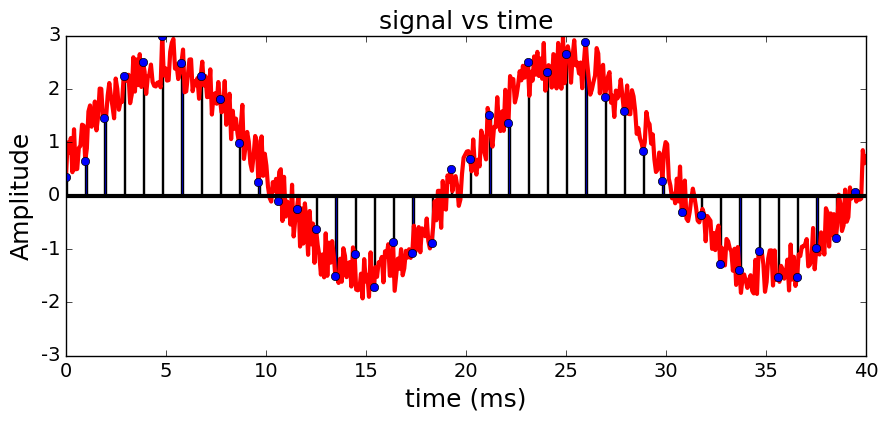

In [415]:
fig1 = plt.figure(figsize=(10,4))
axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes1.plot(x, yc, color='red', linewidth=3, linestyle='-')
axes1.plot(xs, ys, color= 'blue', linestyle=' ', marker='o')
axes1.bar(xs, ys, bottom=0, width=0.02, color='blue')
axes1.axhline(0, color='black', linestyle='-', linewidth=3)

axes1.set_ylim([-3, 3])
axes1.set_xlim([0, np.max(x)])
axes1.set_xticks((2*3.14*freq)*(np.arange(0, 41, 5)*1e-3))
axes1.set_xticklabels(np.arange(0, 41, 5), fontsize=14)
# axes1.set_yticks([-4 -2, 0, 2, 4])
axes1.set_yticklabels(np.arange(-3, 4), fontsize=14)
axes1.set_xlabel("time (ms)", fontsize=18);
axes1.set_ylabel("Amplitude", fontsize=18);
axes1.set_title("signal vs time", fontsize=18);


In [451]:
import re
import time
from datetime import *
s = lambda x: re.sub("_","",x,count=1)
df = pd.read_csv('data/16-Jan-201745618PM.csv', parse_dates=True)
new_cols = [col.lower().strip().replace(' ', '_') for col in df.columns]
df.columns = [s(col) for col in new_cols]
df.columns

Index([u'accx', u'accy', u'accz', u'variable(xyz)', u'isbump',
       u'thresholdhigh', u'thresholdlow', u'car', u'gyrx', u'gyry', u'gyrz',
       u'latitude', u'longitude', u'timestamp', u'accuracy(m)'],
      dtype='object')

In [452]:
pt = lambda t: parse(t)
df['parsed_ts'] = df.timestamp.apply(pt)
df2 = df.set_index('parsed_ts')

In [453]:
# dtmask = df2.index == pd.to_datetime('2017-01-16T16:56:26.000000000')
# df2[dtmask].shape
# df2.groupby([df2.index.hour, df2.index.minute, df2.index.second]).count()['accx']

In [454]:
x = df.index.values

In [455]:
y = df.accz.values

(0, 32407)

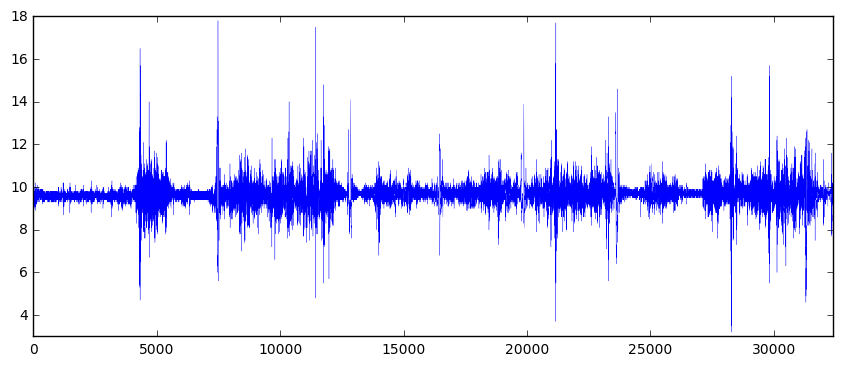

In [456]:
fig2 = plt.figure(figsize=(10,4))
axes2 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])

# axes2.plot(x, yc, color='red', linewidth=3, linestyle='-')
axes2.plot(x, y, color= 'blue', linestyle='-', lw=.2)
# axes2.bar(x, y, bottom=0, width=0.02, color='blue')
axes2.axhline(0, color='black', linestyle='-', linewidth=3)

axes2.set_ylim([3, 18])
axes2.set_xlim([0, np.max(x)])
# axes2.set_xticks((2*3.14*freq)*(np.arange(0, 41, 5)*1e-3))
# axes2.set_xticklabels(np.arange(0, 41, 5), fontsize=14)
# axes2.set_yticks([-2 -1, 0, 1, 2])
# axes2.set_yticklabels([-2, -1, 0, 1, 2], fontsize=14)
# axes2.set_xlabel("time (ms)", fontsize=18);
# axes2.set_xlabel("Amplitude", fontsize=18);
# axes2.set_title("signal vs time", fontsize=18);

In [457]:
freq_dict = df2.groupby([df2.index.hour, df2.index.minute, df2.index.second]).count()['accx'].to_dict()

In [458]:
freq_dict

{(16, 55, 59): 125,
 (16, 56, 19): 141,
 (16, 56, 21): 72,
 (16, 56, 22): 78,
 (16, 56, 23): 73,
 (16, 56, 24): 75,
 (16, 56, 25): 77,
 (16, 56, 26): 75,
 (16, 56, 27): 75,
 (16, 56, 28): 76,
 (16, 56, 29): 75,
 (16, 56, 30): 77,
 (16, 56, 31): 75,
 (16, 56, 32): 75,
 (16, 56, 33): 76,
 (16, 56, 34): 75,
 (16, 56, 35): 77,
 (16, 56, 36): 76,
 (16, 56, 37): 74,
 (16, 56, 38): 76,
 (16, 56, 39): 75,
 (16, 56, 40): 80,
 (16, 56, 41): 72,
 (16, 56, 42): 76,
 (16, 56, 43): 75,
 (16, 56, 44): 75,
 (16, 56, 45): 77,
 (16, 56, 46): 75,
 (16, 56, 47): 76,
 (16, 56, 48): 75,
 (16, 56, 49): 77,
 (16, 56, 50): 75,
 (16, 56, 51): 75,
 (16, 56, 52): 76,
 (16, 56, 53): 75,
 (16, 56, 54): 75,
 (16, 56, 55): 77,
 (16, 56, 56): 75,
 (16, 56, 57): 75,
 (16, 56, 58): 76,
 (16, 56, 59): 78,
 (16, 57, 0): 74,
 (16, 57, 1): 75,
 (16, 57, 2): 76,
 (16, 57, 3): 75,
 (16, 57, 4): 78,
 (16, 57, 5): 74,
 (16, 57, 6): 75,
 (16, 57, 7): 76,
 (16, 57, 8): 75,
 (16, 57, 9): 75,
 (16, 57, 10): 77,
 (16, 57, 11): 76,
 

In [487]:
from datetime import datetime, date, time, timedelta
date = df.parsed_ts[0].date()
sample = df.parsed_ts[0] + timedelta(microseconds=13000)
sample

Timestamp('2017-01-16 16:55:59.013000')

In [483]:
rng = pd.date_range(df.timestamp.min(),df.timestamp.max(), freq='s')
ts = pd.Series(index=rng)
converted = ts.asfreq('13ms', method='pad')
# converted

In [508]:
for dt in pd.date_range(df.timestamp.min(),df.timestamp.max(), freq='s'):
    try:
        freq = freq_dict[(dt.hour, dt.minute, dt.second)]
    except:
        pass
    

In [496]:
df.parsed_ts[0].time()

datetime.time(16, 55, 59)

In [511]:
df.ix[df.parsed_ts == df.parsed_ts[0],:]

,accx,accy,accz,variable(xyz),isbump,thresholdhigh,thresholdlow,car,gyrx,gyry,gyrz,latitude,longitude,timestamp,accuracy(m),parsed_ts
0,-0.1,2.4,9.7,Z,0,12.5,7.5,indica None,0.1,-0.0,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
1,-0.1,2.4,9.7,Z,0,12.5,7.5,indica None,0.0,0.0,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
2,-0.1,2.3,9.8,Z,0,12.5,7.5,indica None,0.0,0.0,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
3,-0.2,2.4,9.7,Z,0,12.5,7.5,indica None,0.0,0.0,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
4,-0.2,2.4,9.7,Z,0,12.5,7.5,indica None,0.1,-0.1,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
5,-0.1,2.5,9.2,Z,0,12.5,7.5,indica None,0.1,-0.1,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
6,-0.1,2.6,9.0,Z,0,12.5,7.5,indica None,0.1,-0.1,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
7,-0.1,2.6,9.0,Z,0,12.5,7.5,indica None,0.1,-0.1,-0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
8,0.0,2.5,9.2,Z,0,12.5,7.5,indica None,0.1,-0.1,-0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
9,0.1,2.3,9.6,Z,0,12.5,7.5,indica None,0.1,-0.1,-0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59


In [515]:
df.parsed_ts.loc[5]

Timestamp('2017-01-16 16:55:59')

,accx,accy,accz,variable(xyz),isbump,thresholdhigh,thresholdlow,car,gyrx,gyry,gyrz,latitude,longitude,timestamp,accuracy(m),parsed_ts
0,-0.1,2.4,9.7,Z,0,12.5,7.5,indica None,0.1,-0.0,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
1,-0.1,2.4,9.7,Z,0,12.5,7.5,indica None,0.0,0.0,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
2,-0.1,2.3,9.8,Z,0,12.5,7.5,indica None,0.0,0.0,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
3,-0.2,2.4,9.7,Z,0,12.5,7.5,indica None,0.0,0.0,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
4,-0.2,2.4,9.7,Z,0,12.5,7.5,indica None,0.1,-0.1,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
5,-0.1,2.5,9.2,Z,0,12.5,7.5,indica None,0.1,-0.1,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
6,-0.1,2.6,9.0,Z,0,12.5,7.5,indica None,0.1,-0.1,0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
7,-0.1,2.6,9.0,Z,0,12.5,7.5,indica None,0.1,-0.1,-0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
8,0.0,2.5,9.2,Z,0,12.5,7.5,indica None,0.1,-0.1,-0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
9,0.1,2.3,9.6,Z,0,12.5,7.5,indica None,0.1,-0.1,-0.0,12.889581,77.563345,16-Jan-2017 4:55:59 PM,9.0,2017-01-16 16:55:59
